<a target="_blank" href="https://colab.research.google.com/github/mariajosesalasmiranda/Emotion-Vision/blob/main/train_model.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

## Facial Emotion Recognition:  Classifying Expressions Using Deep Neural Networks

Brief intoriodtion of this projetc

### Install the libraries
The first step is to install all the libraries necessaries.

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os

### Check the images
Then we need to dowload the "archieve" folder. This folder need to be download or from the [Kaggle community](https://www.kaggle.com/datasets/msambare/fer2013?select=train), otherwise directly from the GitHub 

In [3]:
img_array = cv2.imread("archive/test/angry/PrivateTest_7833671.jpg")

In [4]:
img_array.shape

(48, 48, 3)

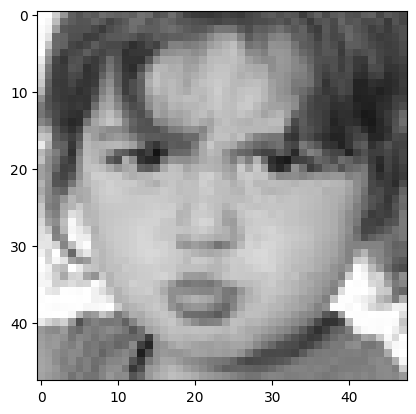

In [6]:
plt.imshow(img_array)